In [34]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [35]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [36]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [37]:
# List of keywords to include
keywords = [
    'CK_Measurements of the Earth',
    'CK_Circle and Diameter Rule',
    'CK_Planets Sizes and Distances',
    'CK_Correlation Between Distances on Earth and Locations of Stars',
    'CK_Assumed Parallellity of the Sun Rays'
]

# Combine keywords into a single pattern string
pattern = '|'.join([fr'\b{keyword}\b' for keyword in keywords])

# Filter the DataFrame
earth_size = df[df['cks'].str.contains(pattern, case=False, na=False)]

earth_size = earth_size[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
earth_size.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

earth_size

,images,cluster_name,cks,bid,part_id,year,place
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris
7,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02191,CK_Planets Sizes and Distances,1624,231,1494,Paris
175,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1925,322,1490,Venice
179,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01134,"CK_Measurements of the Earth, CK_Geometry for ...",1925,322,1490,Venice
181,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1925,322,1490,Venice
...,...,...,...,...,...,...,...
20776,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00493,CK_Correlation Between Distances on Earth and ...,2269,805,1551,Paris
20799,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00493,CK_Correlation Between Distances on Earth and ...,2270,805,1552,Paris
20837,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg
20874,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01510,CK_Circle and Diameter Rule,2277,919,1555,Antwerp


In [38]:
count_unique = earth_size['cluster_name'].nunique()
print(f"Unique values count: {count_unique}")

Unique values count: 55


In [39]:
#unique_values = earth_size['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('earth_size.xlsx', index=False, sheet_name='Sheet1')

In [40]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [41]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\treatises_books_part_types.xlsx'
treatises_books_part_types = pd.read_excel(path_to_xlsx1)
treatises_books_part_types = treatises_books_part_types[['bid', 'custom_identifier', 'part_type']]
treatises_books_part_types.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [42]:
# Ensure both DataFrames are not views
earth_size = earth_size.copy()
treatises_books_part_types = treatises_books_part_types.copy()

# Convert 'part_id' to string in both DataFrames using .loc to avoid SettingWithCopyWarning
earth_size.loc[:, 'part_id'] = earth_size['part_id'].astype(str)
treatises_books_part_types.loc[:, 'part_id'] = treatises_books_part_types['part_id'].astype(str)

# Perform the merge
earth_size_full = pd.merge(earth_size, treatises_books_part_types, on='part_id')

earth_size_full

C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\1057324246.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['100' '240' '291' ... '434' '938' '940']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  treatises_books_part_types.loc[:, 'part_id'] = treatises_books_part_types['part_id'].astype(str)


,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1624,other
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1659,other
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1823,other
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1826,other
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1828,other
...,...,...,...,...,...,...,...,...,...
8925,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2182,influenced_100
8926,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2183,influenced_100
8927,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2271,influenced_100
8928,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01510,CK_Circle and Diameter Rule,2277,919,1555,Antwerp,2277,influenced_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\3193065510.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = earth_size_full.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\3193065510.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_count = books.groupby('interval').size()


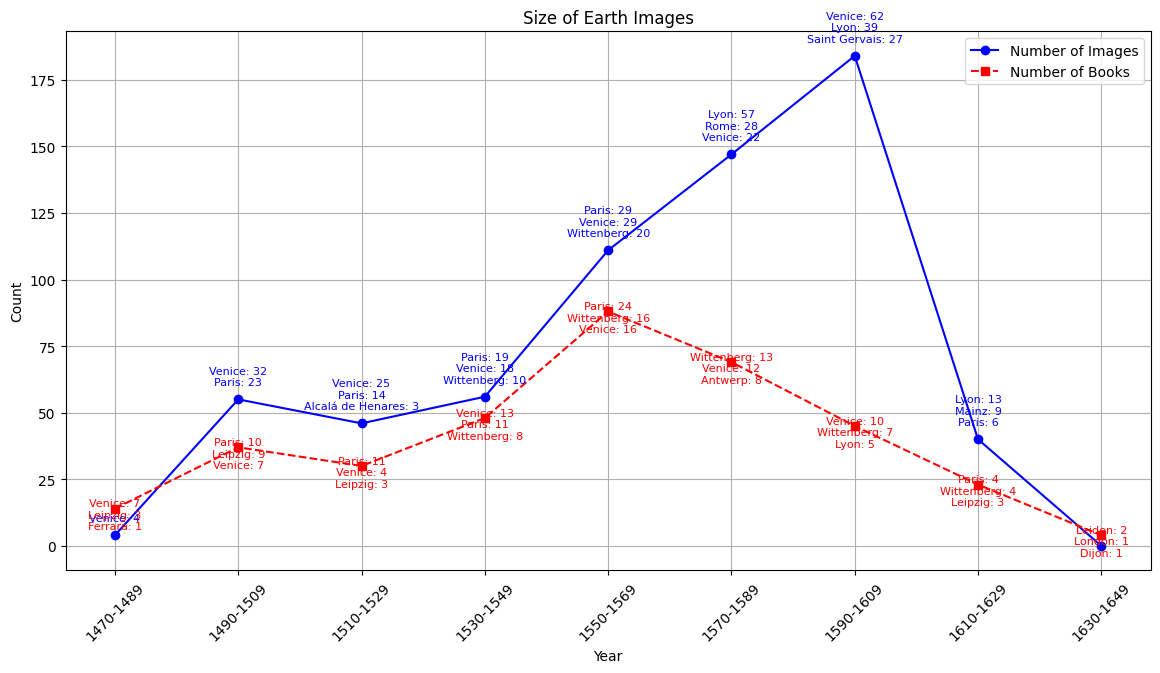

In [43]:
# Ensure the 'year' column is of type int
earth_size_full['year'] = earth_size_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
earth_size_full['interval'] = pd.cut(earth_size_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = earth_size_full.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = earth_size_full[earth_size_full['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Size of Earth Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

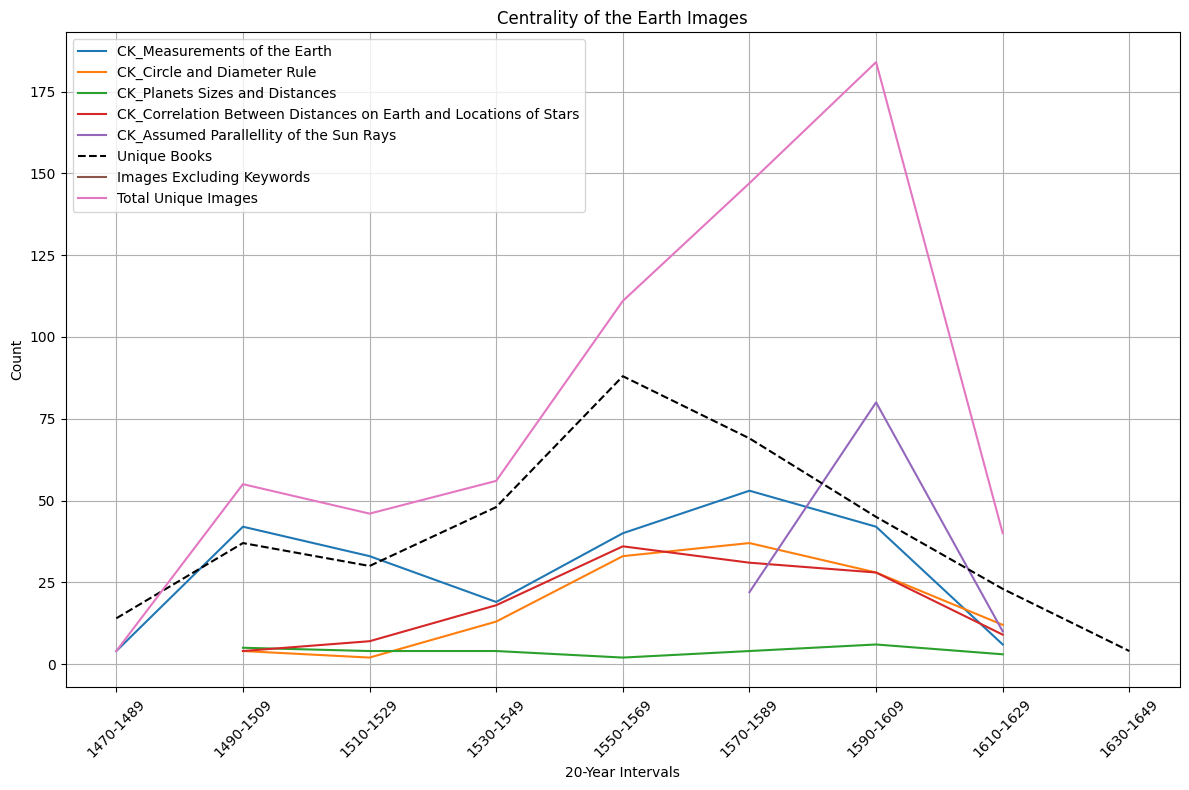

In [44]:
# Define the 20-year intervals
# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Convert year columns to numeric
earth_size_full['year'] = pd.to_numeric(earth_size_full['year'], errors='coerce')
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Convert 'cks' column to string
earth_size_full['cks'] = earth_size_full['cks'].astype(str)

# Add an 'interval' column to both DataFrames
earth_size_full['interval'] = pd.cut(earth_size_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords and map to desired column names
keywords_list = {
    'CK_Measurements of the Earth': 'CK_Measurements of the Earth',
    'CK_Circle and Diameter Rule': 'CK_Circle and Diameter Rule',
    'CK_Planets Sizes and Distances': 'CK_Planets Sizes and Distances',
    'CK_Correlation Between Distances on Earth and Locations of Stars': 'CK_Correlation Between Distances on Earth and Locations of Stars',
    'CK_Assumed Parallellity of the Sun Rays': 'CK_Assumed Parallellity of the Sun Rays'
}

# Function to count unique images for each keyword
def count_unique_images_for_keyword(keyword):
    return earth_size_full[earth_size_full['cks'].str.contains(keyword, na=False)].groupby('interval', observed=True)['images'].nunique()

# Prepare data for plotting
plot_data = pd.DataFrame(index=labels)

# Collect unique images for each keyword
for label, keyword in keywords_list.items():
    plot_data[label] = count_unique_images_for_keyword(keyword)

# Calculate number of unique books in each interval
book_counts = books.groupby('interval', observed=True)['book'].nunique()
plot_data['Unique Books'] = book_counts

# Calculate number of unique images that do not have the specified keywords
def count_unique_images_excluding_keywords(keywords):
    mask = earth_size_full['cks'].str.contains('|'.join(keywords), na=False)
    return earth_size_full[~mask].groupby('interval', observed=True)['images'].nunique()

plot_data['Images Excluding Keywords'] = count_unique_images_excluding_keywords(list(keywords_list.values()))

# Calculate total number of unique images in each interval
total_unique_images = earth_size_full.groupby('interval', observed=True)['images'].nunique()
plot_data['Total Unique Images'] = total_unique_images

# Plotting
plt.figure(figsize=(12, 8))

# Plot each line with default color and style
for column in plot_data.columns:
    if column == 'Unique Books':
        plt.plot(plot_data.index, plot_data[column], label=column, color='black', linestyle='--')
    else:
        plt.plot(plot_data.index, plot_data[column], label=column)

plt.xlabel('20-Year Intervals')
plt.ylabel('Count')
plt.title('Centrality of the Earth Images')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\earth_size.xlsx'
earth_size_visual = pd.read_excel (path_to_xlsx)
earth_size_with_visual = pd.merge(earth_size_full, earth_size_visual, on='cluster_name')
earth_size_with_visual

,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type,interval,3D,human figures,simple,color,diagram,decoration,material globus,multiple perspectives
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1624,other,1490-1509,no,no,yes,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1659,other,1490-1509,no,no,yes,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1823,other,1490-1509,no,no,yes,no,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1826,other,1490-1509,no,no,yes,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01224,"CK_Definition of Sphere by Euclid, CK_Measurem...",1624,110,1494,Paris,1828,other,1490-1509,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2182,influenced_100,1570-1589,yes,no,no,no,no,yes,no,no
8926,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2183,influenced_100,1570-1589,yes,no,no,no,no,yes,no,no
8927,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01510,CK_Circle and Diameter Rule,2271,503,1576,Wittenberg,2271,influenced_100,1570-1589,yes,no,no,no,no,yes,no,no
8928,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01510,CK_Circle and Diameter Rule,2277,919,1555,Antwerp,2277,influenced_100,1550-1569,yes,no,no,no,no,yes,no,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\2197437405.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\2197437405.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_15752\2197437405.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

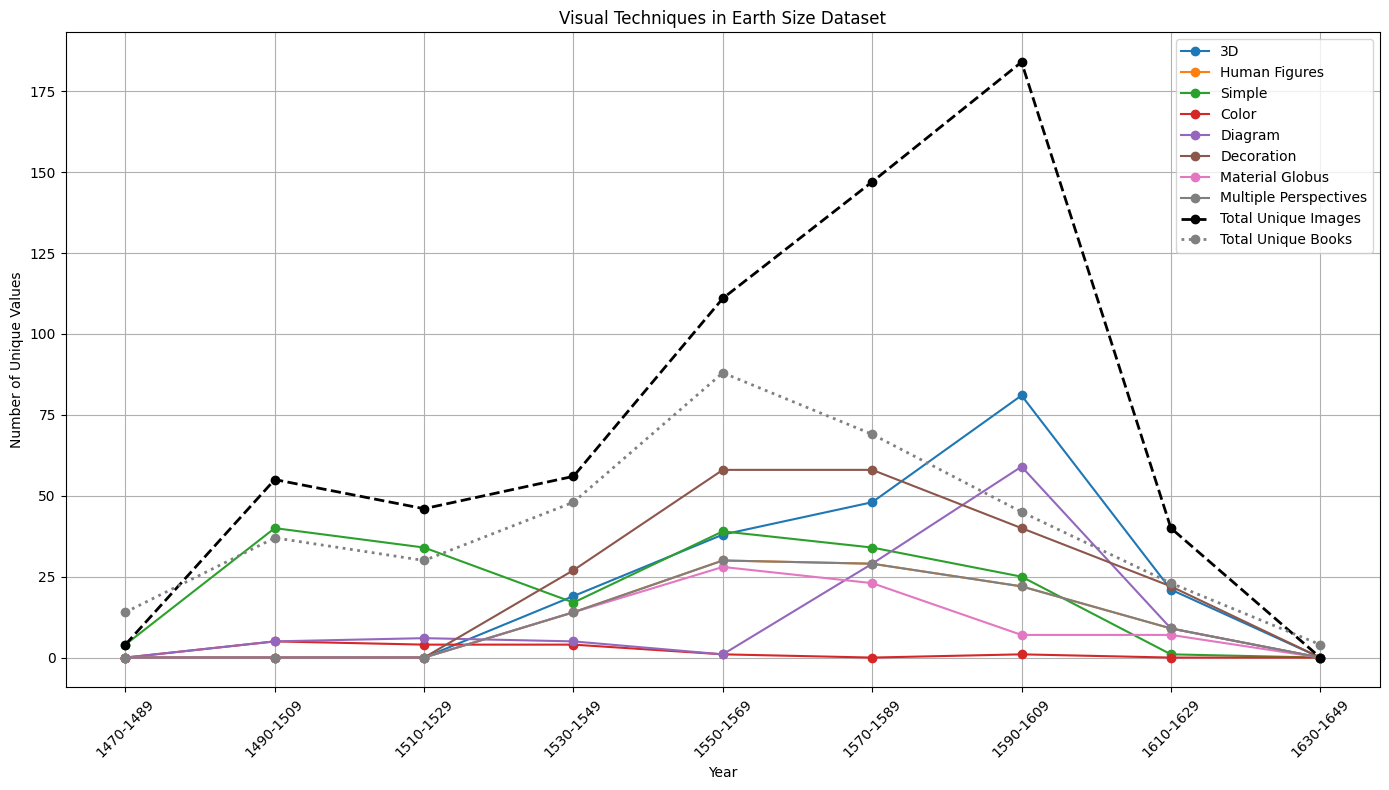

In [48]:
# Convert 'year' to int
earth_size_with_visual['year'] = earth_size_with_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
earth_size_with_visual['interval'] = pd.cut(earth_size_with_visual['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = earth_size_with_visual[earth_size_with_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
simple = count_unique_images_by_column('simple', 'yes')
color = count_unique_images_by_column('color', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
material_globus = count_unique_images_by_column('material globus', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Simple': simple,
    'Color': color,
    'Diagram': diagram,
    'Decoration': decoration,
    'Material Globus': material_globus,
    'Multiple Perspectives': multiple_perspectives
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = earth_size_with_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Size Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
